# Exercice récapitulatif 2

## Enoncé

Supposons qu'un four industriel soit décrit par l'équation différentielle non-linéaire suivante:

$$ \frac{d^{2}y}{dt^{2}} + 15\frac{dy}{dt}\left|\frac{dy}{dt}\right| + 0.5y^{1.5} = u $$

Ce four travaille autour de $300\,^{\circ}\mathrm{C}$. L'opérateur vous signale tout de même qu'il arrive souvent de modifier le point de fonctionnement dans une plage de $\pm 10 \%$.

L'opérateur vous informe aussi que la procédure est de laisser le four chauffer pendant $50\, \mathrm{s}$ avant d'effectuer une quelconque action.

Il vous est demandé de:

1. vérifier la stabilité du système non-linéaire autour du point de fonctionnement
2. linéariser le système autour du point de fonctionnement et discrétiser le système obtenu
3. vérifier la stabilité du système discret
4. synthétiser un régulateur afin d'avoir un temps de réponse 2 fois plus petit, un écart statique nul et des marges suffisantes
5. appliquer le régulateur au système non-linéaire en respectant les consignes de l'opérateur
6. identifier le système non-linéaire autour du point de fonctionnement et comparer le modèle obtenu avec le modèle obtenu par linéarisation

---

## Solution

### 1. Vérifier la stabilité du système non-linéaire autour du point de fonctionnement

L'équation différentielle peut être remise sous la forme d'état suivante, en prenant $y_1=y$ et $y_2=\dot{y}$ comme variables d'états:

\begin{align}
  \dot{y_1} &= y_2 \\
  \dot{y_2} &= -0.5y_1^{1.5} - 15y_2\left|y_2\right| + u^*
\end{align}

Au point de fonctionnement, la commande $u^*$ peut être trouvée pour $y_1=300$, $y_2=0$ et $\dot{y_1}=\dot{y_2}=0$:

\begin{align}
  0 &= y_2 \\
  0 &= -0.5y_1^{1.5} + u^*
\end{align}

La commande $u^*$ vaut donc:

$$ u^* = 0.5 * 300^{1.5} = 2598 $$

Effectuons un changement de variable afin de travailler autour du point $x=0$ et $u=0$; pour cela on définit:

\begin{align}
  & x_1 = y_1 - 300 \\
  & x_2 = y_2 \\
  & u = u^* - 2598
\end{align}

On obtient donc:

\begin{align}
  & \dot{x_1} = \dot{y_1} \\
  & \dot{x_2} = \dot{y_2}
\end{align}

L'équation d'état autour du point de fonctionnement, après changement de variable devient:

\begin{align}
  \dot{x_1} &= x_2 \\
  \dot{x_2} &= -0.5(x_1+300)^{1.5} - 15x_2\left|x_2\right| + u + 2598
\end{align}

En appliquant les dérivées, on obtient:

\begin{align}
  \frac{df_1}{dx_1} &= 0 \\
  \frac{df_1}{dx_2} &= 1 \\
  \frac{df_1}{du} &= 0 \\
  \frac{df_2}{dx_1} &= -0.75(x_1+300)^{0.5} \\
  \frac{df_2}{dx_2} &= -30x_2 \\
  \frac{df_2}{du} &= 1
\end{align}

Le système linéarisé autour du point $x_1=x_2=u=0$ est:

$$
\left[
\begin{array}{c}
  \dot{x_1} \\
  \dot{x_2}
\end{array}
\right] =
\left[
\begin{array}{cc}
  0 & 1 \\
  -13 & 0
\end{array}
\right] 
\left[
\begin{array}{c}
  x_1 \\
  x_2
\end{array}
\right] +
\left[
\begin{array}{c}
  0 \\
  1
\end{array}
\right] u
$$

On peut alors déterminer les valeurs propres de la matrice A:

In [52]:
%matplotlib notebook
# inline
import matplotlib.pyplot as plt
plt.style.use('../my_params.mplstyle')

import numpy as np
from scipy import linalg

import control
import examples

In [53]:
A = np.array([[0, 1], [-13, 0]])

eigen_values = linalg.eigvals(A)
print(eigen_values)

[0.+3.60555128j 0.-3.60555128j]


Les valeurs propres ayant une partie réelle nulle, il est impossible de tirer une conclusion quant à la stabilité!

Cependant, l'équation différentielle du second ordre montre que le système peut être vu comme un système masse-ressort-amortisseur dont la force de rappel du ressort grandit, via l'exposant $1.5$, au fur et à mesure que la distance augmente, et l'amortisseur agit de manière quadratique avec la vitesse. Le système aura donc tendance à réagir vite lors d'un changement de consigne mais sera fortement ralenti par après. Il devrait donc être stable.

### 2. Linéariser le système autour du point de fonctionnement et discrétiser le système obtenu

Le système linéarisé a été obtenu au point précédent:

$$
\left[
\begin{array}{c}
  \dot{x_1} \\
  \dot{x_2}
\end{array}
\right] =
\left[
\begin{array}{cc}
  0 & 1 \\
  -13 & 0
\end{array}
\right] 
\left[
\begin{array}{c}
  x_1 \\
  x_2
\end{array}
\right] +
\left[
\begin{array}{c}
  0 \\
  1
\end{array}
\right] u
$$

La sortie de notre système étant la température $y_1$, on choisit, pour l'étude linéaire, la sortie modifiée $x_1$. L'équation peut alors être transformée successivement:

\begin{align}
  \dot{x_1} &= x_2 \\
  \dot{x_2} &= -13x_1 + u
\end{align}

Comme $\dot{x_2}=\ddot{x_1}$, la seconde équation devient:

$$ \ddot{x_1} + 13x_1 = u $$

Par la transformée de Laplace, on obtient:

\begin{align}
  s^2 X_1 + 13 X_1 = U \\
  \frac{X_1}{U} = \frac{1}{s^2 + 13}
\end{align}

Cette fonction de transfert ressemble à celle d'une sinusoïde. Avec un artifice de calcul, on obtient:

$$ \frac{X_1}{U} = \frac{1}{\sqrt{13}}\frac{\sqrt{13}}{s^2 + 13} = \frac{\omega}{s^2+\omega^2} $$

En identifiant, on a $\omega=\sqrt{13}$.

#### Remarque

La simulation suivante permet de voir la différence notable entre le système réel et sa linéarisation.

In [54]:
class Oven:
    def __init__(self):
        pass

    def x_prime(self, t, x, u):
        dx1_dt = x[1]
        dx2_dt = -0.5 * x[0]**1.5 - 15 * x[1] * abs(x[1]) + u 

        return [dx1_dt, dx2_dt]

<IPython.core.display.Javascript object>


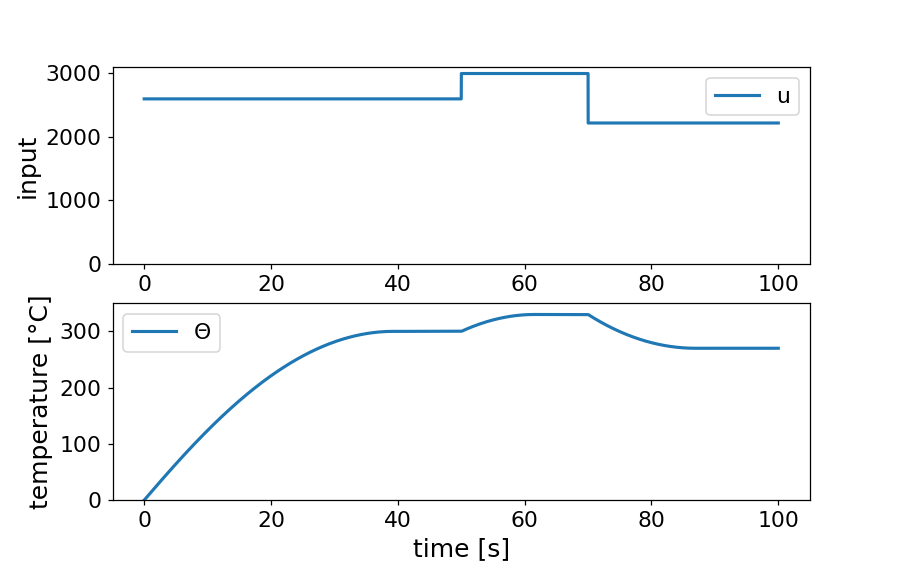

In [86]:
system = Oven()

t_vec = np.linspace(0, 100, 100001)

x = [[0], [0]]
u_vec = [2598 if t < 50 else (0.5*330**1.5 if t < 70 else 0.5*270**1.5) for t in t_vec]

examples.run(system, t_vec, x, u_vec)

fig, axs = plt.subplots(2)
axs[0].plot(t_vec, u_vec, '-', label='u')
axs[1].plot(t_vec, x[0], '-', label=r'$\Theta$')
axs[0].set_ylim(0, 3100)
axs[1].set_ylim(0, 350)
axs[1].set_xlabel('time [s]')
axs[1].set_ylabel('temperature [°C]')
axs[0].set_ylabel('input')
_ = axs[1].legend()
_ = axs[0].legend()

Cette première simulation permet de voir l'évolution du système lors du démarrage pendant $50\, \mathrm{s}$, ainsi que le comportement autour du point de fonctionnement à $\pm10\,\mathrm{\%}$. Par exemple, on remarque que le temps de réponse en montée de $300^\circ \mathrm{C}$ à $330^\circ \mathrm{C}$ est d'environ $10\, \mathrm{s}$ alors qu'en descente de $330^\circ \mathrm{C}$ à $270^\circ \mathrm{C}$ est d'environ $15\, \mathrm{s}$

<IPython.core.display.Javascript object>


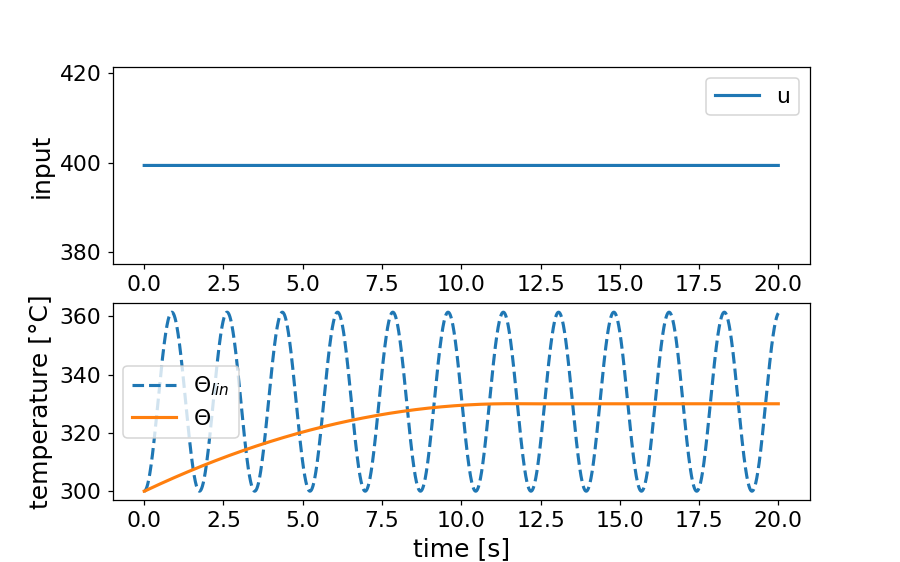

In [56]:
system_1 = Oven()

t_lin = np.linspace(0, 20, 200001)
u_nlin = [0.5*330**1.5 for _ in t_lin]
u_lin = [u - 2598 for u in u_nlin]

x = [[300], [0]]
examples.run(system_1, t_lin, x, u_nlin)

lin_system = control.tf(1, [1, 0, 13])

_, y_lin, _ = control.forced_response(lin_system, t_lin, u_lin)
y = [y_l + 300 for y_l in y_lin]

fig, axs = plt.subplots(2)
axs[0].plot(t_lin, u_lin, '-', label='u')
axs[1].plot(t_lin, y, '--', label=r'$\Theta_{lin}$')
axs[1].plot(t_lin, x[0], '-', label=r'$\Theta$')
axs[1].set_xlabel('time [s]')
axs[1].set_ylabel('temperature [°C]')
axs[0].set_ylabel('input')
_ = axs[1].legend()
_ = axs[0].legend()

La différence importante entre les 2 est due au fait de négliger l'amortissement. Ce dernier est en réalité très important, non seulement par l'effet quadratique, mais aussi son coefficient important ($15$). Il faut donc en tenir compte et imposer des marges aussi élevées que possible sur le système linéaire.

Il vous est proposé de modifier l'équation non-linéaire ainsi afin de mieux comprendre les effets liés à une non-linéarité:

$$ \frac{d^{2}y}{dt^{2}} + 0.1\frac{dy}{dt}\left|\frac{dy}{dt}\right| + 0.5y^{1.5} = u $$

En effectuant un échelon sur $u$ de $\pm5\, \mathrm{\%}$, comparez à nouveau les courbes linéaire et non-linéaire et vous remarquerez une similitude entre les courbes. Bien entendu, la courbe non-linéaire sera amortie, mais ses oscillations auront la même pulsation que celles du système linéaire.

Ce dernier essai permet de mettre en évidence que la linéarisation est d'autant plus précise que le système non-linéaire possède une non-linéarité faible, avec une amplitude faible, et en effectuant des variations faibles sur le système.

---

Avant d'échantillonner le système, il faut choisir une période d'échantillonnage. Comme notre système possède une pulsation $\omega=\sqrt{13}=3.6\, \mathrm{rad/s}$, la pulsation en boucle fermée devra être de $\omega_b=7.2\, \mathrm{rad/s}$.

En choisissant $\omega_e=10\omega_b$, on obtient une pulsation d'échantillonnage $\omega_e=72\, \mathrm{rad/s}$, soit une fréquence d'échantillonnage $f_e=11.5\, \mathrm{Hz}$.

On en tire donc la période d'échantillonnage $h=0.087\, \mathrm{s}$.

Le théorème d'échantillonnage s'écrit ainsi:

$$ G(z) = (1 - z^{-1}) \mathscr{Z}\left\{ \mathscr{L}^{-1} \left(\frac{G(s)}{s}\right) \right\} $$

Commençons donc par calculer la décomposition en somme de fractions simples de $\frac{G(s)}{s}$:

$$ \frac{G(s)}{s} = \frac{1}{s^3 + 13s} = \frac{A}{s} + \frac{Bs+C}{s^2+13} $$

Après calculs, on obtient $A=\frac{1}{13}$, $B=-\frac{1}{13}$ et $C=0$.

La table des transformées du chapitre 4 permet de transformer nos fractions simples en $z$:

$$ \mathscr{Z}\left\{ \mathscr{L}^{-1} \left(\frac{G(s)}{s}\right) \right\} = \frac{1}{13} \left( \frac{z}{z-1} - \frac{z(z-\cos(\omega h))}{z^2-2\cos(\omega h)z+1} \right)$$

Enfin, il suffit de multiplier le résultat précédent par $(1-z^{-1})$ pour obtenir $G(z)$:

$$ G(z) = \frac{1-\cos(\omega h)}{13} \frac{z+1}{z^2-2\cos(\omega h)z+1} $$

In [60]:
h = 0.087
w = np.sqrt(13)
t_s = [i * h for i in range(231)]
u_s = [u_lin[0] for _ in t_s]

k = (1 - np.cos(w*h)) / 13

Gz = control.tf([k, k], [1, -2 * np.cos(w*h), 1], h)

print(Gz)

_, y_samp, _ = control.forced_response(Gz, t_s, u_s)
y_s = [y_l + 300 for y_l in y_samp]

fig, axs = plt.subplots(2)
axs[0].plot(t_s, u_s, '-', label='u')
axs[1].plot(t_lin, y, '--', label=r'$\Theta_{lin}$')
axs[1].step(t_s, y_s, '-', label=r'$\Theta_{samp}$', where='post')
axs[1].set_xlabel('time [s]')
axs[1].set_ylabel('temperature [°C]')
axs[0].set_ylabel('input')
_ = axs[1].legend()
_ = axs[0].legend()


0.003754 z + 0.003754
---------------------
  z^2 - 1.902 z + 1

dt = 0.087



<IPython.core.display.Javascript object>

La simulation précédente montre que la fonction de transfert échantillonnée est correcte.

### 3. Vérifier la stabilité du système discret

Il existe plusieurs manières de vérifier la stabilité du système discret. Utilisons le critère de Jury car c'est le seul critère neuf dans le cadre de ce cours.

Le polynôme caractéristique est le suivant:

$$ D(z) = z^2 - 1.902z + 1 $$

On obtient alors le tableau suivant:

| | | | |
|---|---|---|---|
| $$ \mathbf{1} $$ | $$ -1.902 $$ | $$ 1 $$ | |
| $$ 1 $$ | $$ -1.902 $$ |  $$ 1 $$ | $$ \alpha = 1 $$ |
| $$ \mathbf{0} $$ | $$ 0 $$ | $$ 0 $$ | |

D'après le théorème de Jury, tous les coefficients $a_0^{(i)}$ du tableau possédant $2n+1$ lignes, soit 5 lignes, doivent être positifs pour que le système soit stable. Le nombre de coefficients $a_0^{(i)}$ négatifs correspond au nombre de pôles instables.

Dans notre cas, tous les coefficients $a_0^{(i)}$ sont égaux à zéro. Nous sommes donc à la limite de stabilité.

### 4. Synthétiser un régulateur afin d'avoir un temps de réponse 2 fois plus petit, un écart statique nul et des marges suffisantes

Il est facile de remarquer que l'énoncé "classique" de régulation sera difficile à respecter dans notre cas. En effet, le système non-linéaire est beaucoup plus lent et beaucoup plus stable que sa linéarisation.

La partie négligée de l'équation est un amortisseur très puissant, rendant difficile la prévision du temps de réponse lors d'une étude basée sur la linéarisation. De plus, un amortisseur a tendance à augmenter les marges de stabilité. Ce dernier étant très puissant, on devrait normalement s'attendre à avoir une robustesse suffisante sur le système non-linéaire, malgré les faibles marges sur sa linéarisation.

Il est alors possible d'étudier le problème de 2 manières:

- synthétiser le régulateur linéaire en tenant compte des contraintes sur le temps de réponse et l'écart statique, tout en négligeant l'étude des marges en linéaire vu l'amortissement élevé présent sur le système réel
- soit améliorer les marges du système linéarisé afin d'éviter tout problème potentiel, mais il faudra probablement oublier les contraintes sur le temps de réponse

Traçons d'abord le diagramme de Bode du système discret linéarisé.

In [58]:
mag_g, phase_g, omega = control.bode_plot(Gz, dB=True, omega_limits=[1e-3, 2*np.pi/h], omega_num=100000, Plot=False)

mag_g = [20 * np.log10(m) for m in mag_g]
phase_g = [p * 180 / np.pi for p in phase_g]

# this fixes the computed phase because, for some reasons, many packages fail to compute the phase correctly
for i, w in enumerate(omega):
    if w > 3.6055:
        phase_g[i] -= 360

fig, axs = plt.subplots(2)
axs[0].semilogx(omega, mag_g)
axs[1].semilogx(omega, phase_g, omega, [-180 for w in omega], '--')
axs[1].set_xlabel('Frequency [rad/sec]')
axs[0].set_ylabel('Magnitude (dB)')
axs[1].set_ylabel('Phase (deg)')
axs[0].grid(which='both')
axs[1].grid(which='both')

<IPython.core.display.Javascript object>

Ajoutons un simple PI, de telle sorte que l'amplitude croise l'axe $\omega$ en $7.2\, \mathrm{rad/sec}$. Pour cela, fixons d'abord $K_p$ pour translater la courbe des amplitudes verticalement puis réglons $T_i$ le plus proche du pic d'amplitude sans modifier la fréquence de coupure fixée par $K_p$.

In [59]:
Kp = 10 ** (32 / 20)

zi = np.exp(-0.15 * h)
Ti = h * zi / (1 - zi)

print("Kp = {:2.2f}; Ti = {:2.2f}".format(Kp, Ti))

K = Kp * (1 + h / Ti) * control.tf([1, -zi], [1, -1], h)

print(Kp * (1 + h / Ti), zi)

mag_k, phase_k, omega = control.bode_plot(K, dB=True, omega_limits=[1e-3, 2*np.pi/h], omega_num=100000, Plot=False)
     
mag = [m1 + 20 * np.log10(m2)  for m1, m2 in zip(mag_g, mag_k)]
phase = [p1 + p2 * 180 / np.pi for p1, p2 in zip(phase_g, phase_k)]
        
fig, axs = plt.subplots(2)
axs[0].semilogx(omega, mag)
axs[1].semilogx(omega, phase, omega, [-180 for w in omega], '--')
axs[1].set_xlabel('Frequency [rad/sec]')
axs[0].set_ylabel('Magnitude (dB)')
axs[1].set_ylabel('Phase (deg)')
axs[0].grid(which='both')
axs[1].grid(which='both')

Kp = 39.81; Ti = 6.62
40.333651639683644 0.9870347820473712


<IPython.core.display.Javascript object>

La translation est effectuée par un gain $K_p=39.8$. Ensuite, la valeur de $T_i$ la plus petite ne modifiant pas trop la fréquence de coupure, trouvée par essai-erreur, est $T_i=6.62$.

Il est clair que le système linéaire obtenu est instable. Cependant, nous pouvons prendre le risque de l'implémenter tel quel sur le système non-linéaire car nous savons qu'il possède un énorme amortissement négligé.

Si nous voulions réellement régler ce système linéaire à l'aide d'un PID, on pourrait ajouter une action dérivée positionnée de telle sorte à fixer la marge de phase à la fréquence de coupure. Ce réglage se ferait à nouveau par essai-erreur ou par calculs.

Cependant, notre objectif étant le système non-linéaire, implémentons le régulateur tel quel en faisant confiance à la capacité d'amortissement élevée du système.

### 5. Appliquer le régulateur au système non-linéaire en respectant les consignes de l'opérateur

Afin d'appliquer le régulateur, il faut tenir compte de ce qui suit:

- le système doit être soumis à une commande de préchauffage pendant $50\, \mathrm{s}$, sans régulateur
- le régulateur doit appliquer une commande s'additionnant à la commande de préchauffage
- le régulateur étant discret, le régulateur ne sera pas executé à la même cadence que le système

In [61]:
class Controller:
    def __init__(self, h):
        self.h = h
        
        self.Kp = 10 ** (32 / 20)

        zi = np.exp(-0.15 * h)
        self.Ti = h * zi / (1 - zi)
        
        self.e = 0
        
    def run(self, yc, y):
        e = yc - y
        k = (1 + self.h / self.Ti)
        
        du = self.Kp * k * (e - 1 / k * self.e)
        
        self.e = e
        
        return du
    

class Controlled_Oven:
    def __init__(self, h, u_pre):
        self.oven = Oven()
        self.controller = Controller(h)
        
        self.u_pre = u_pre

    def x_prime(self, t, x, yc):
        du = 0
        
        # activate the controller after 50s and only at each sampling time
        if t >= 50 and np.isclose(t % self.controller.h, 0.0):
            du = self.controller.run(yc, x[1])
            
        u = self.u_pre + x[0] + du
        
        # disturbance value added
        if t >= 90 and t <= 110:
            u *= 1.2 

        dx1_dt = x[2]
        dx2_dt = -0.5 * x[1] ** 1.5 - 15 * x[2] * abs(x[2]) + u

        return [du / 0.001, dx1_dt, dx2_dt]

In [62]:
t_start = 0
t_end = 130
dt = 0.001

t_vec = np.linspace(t_start, t_end, int((t_end - t_start) / dt) + 1)

u_pre = 0.5 * (300 ** 1.5)

system_5 = Controlled_Oven(h, u_pre)

yc_vec = [300 if t < 50 else (330 if t < 70 else 270) for t in t_vec]

x = [[0], [0], [0]]

examples.run(system_5, t_vec, x, yc_vec)

u_vec = [u_c + u_pre for u_c in x[0]]
w_vec = [0.2 * u if t >= 90 and t <= 110 else 0 for u, t in zip(u_vec, t_vec)]

fig, axs = plt.subplots(2)
axs[0].plot(t_vec, yc_vec, '-', label=r'$y_c$')
axs[0].plot(t_vec, x[1], '--', label=r'$\Theta$')
axs[1].step(t_vec, u_vec, '-', label=r'$u$', where='post')
axs[1].plot(t_vec, w_vec, '--', label=r'$w$')
axs[0].set_ylim(0, 350)
axs[1].set_xlabel('time [s]')
axs[0].set_ylabel('temperature [°C]')
axs[1].set_ylabel('input')
_ = axs[1].legend()
_ = axs[0].legend()

<IPython.core.display.Javascript object>

Le réglage obtenu est assez correct; non seulement les erreurs statiques sont nulles, mais en plus les temps de réponse en montée et en descente valent respectivement $5\, \mathrm{s}$ et $\pm7\, \mathrm{s}$. De plus, une perturbation de $\pm20\, \%$ de la commande ne génère qu'un dépassement de $7^\circ \mathrm{C}$; le système reste donc dans la zone à $\pm 5\, \%$ et s'atténue en $\pm 15\, \mathrm{s}$.

Il est bien entendu possible de fine-tune le régulateur directement sur le système non-linéaire, maintenant que nous possédons un premier réglage satisfaisant.

### 6. Identifier le système non-linéaire autour du point de fonctionnement et comparer le modèle obtenu avec le modèle obtenu par linéarisation

La méthodologie appliquée est la suivante:

- définir la prbs à appliquer sur le système afin que l'essai ne soit pas trop long
- simuler la sortie du système non-linéaire soumis à la prbs
- appliquer l'algorithme d'identification des moindres carrés sur l'ensemble des mesures obtenues
- comparer le modèle obtenu au système non-linéaire

Reprenons d'abord la fonction précédemment définie afin de générer le SBPA:

In [63]:
def generate_prbs(a, n=8, te=None):
    i_dict = {
        2: (1,),
        3: (2,),
        4: (3,),
        5: (3,),
        6: (5,),
        7: (4,),
        8: (2, 3, 4,),
        9: (5,),
        10: (7,),
    }
    
    l = 2 ** n - 1
    i_list = i_dict[n]
    
    if te is None or te <= l:
        te = l + 1
    
    register = l
    
    for j in range(te):
        signal = (register & (2 ** (n - 1))) >> (n - 1)
        yield a if signal else -a
        
        for i in i_list:
            signal ^= (register & (2 ** (i - 1))) >> (i - 1)
            
        register <<= 1
        register &= l
        register |= signal

Définissons maintenant les paramètres du SBPA:

In [130]:
# rising time: defined as the falling time between 330 and 270
tm = 17

# setup the prbs
q = 25
th = q * h
n = int(tm / th)

n_points = 1 * (2 ** n)

print('Simulation time step: {:.3f} s'.format(dt))
print('Sampling time: {:.3f} s'.format(h))
print('PRBS period: {:.3f} s'.format(th))
print('PRBS bits number: {}'.format(n))

Simulation time step: 0.001 s
Sampling time: 0.087 s
PRBS period: 2.175 s
PRBS bits number: 7


Initialisons maintenant la simulation:

In [131]:
# simulation runs at 0.001s, sampling is at 0.087s and prbs is at 2.175s
coef = int(q * h / dt)

ticks = [i for i in range(coef * n_points)]
time = [t * dt for t in ticks]

# initialise x and u for k = 0
x_list = [[300], [0]]
u_gen = generate_prbs(1, n, te=n_points)

u_list = []

for t in ticks:
    # compute the new prbs value, knowing th = q * h
    if not t % coef:
        u = 0.5 * 330**1.5 if next(u_gen) > 0 else 0.5 * 270**1.5
    else:
        u = u_list[-1]
    u_list.append(u)

Simulons le système:

In [132]:
system_6 = Oven()

examples.run(system_6, time, x_list, u_list)

Comme la simulation a été effectuée à $dt = 0.001\, \mathrm{s}$, nous devons échantillonner les signaux obtenus pour $h = 0.087\, \mathrm{s}$ car notre système de mesure est cadencé à cette valeur:

In [133]:
# resampling to get only points at sampling time
t_vec = []
y_vec = []
u_vec = []

for i, t, y, u in zip(ticks, time, x_list[0], u_list):
    if not i % 87:
        t_vec.append(t)
        y_vec.append(y)
        u_vec.append(u)

Affichons maintenant les mesures obtenues:

In [135]:
fig, axs = plt.subplots(2, 1, constrained_layout=True)
axs[0].plot(t_vec, y_vec, '-', label='theta')
axs[1].plot(t_vec, u_vec, '-', label='u')
axs[0].set_ylabel('y')
axs[1].set_ylabel('u')
axs[1].set_xlabel('time [s]')
_ = axs[0].legend()
_ = axs[1].legend()

<IPython.core.display.Javascript object>

Afin d'identifier le processus, prenons un système du second ordre:

$$ G(z) = \frac{b_0 z + b_1}{z^2 + a_1 z + a_2} $$

In [144]:
def ls_estimate(u_list, y_list, order=2):
    y = np.array(y_list[1:])
    
    nbr_params = 2 * order
    phi = np.zeros((len(y), nbr_params))
    
    for i, row in enumerate(phi):
        for j in range(nbr_params // 2):
            k = max(i - j, 0)
            row[j] = -y_list[k]
            
        for j in range(nbr_params // 2):
            k = max(i - j, 0)
            row[nbr_params // 2 + j] = u_list[k]
            
        # row[1] = -y_list[0] if i == 0 else -y_list[i-1]
        # row[2] = u_list[i]
        # row[3] = u_list[0] if i == 0 else u_list[i-1]
    
    theta = np.linalg.inv(phi.transpose() @ phi) @ phi.transpose() @ y

    return theta

In [160]:
order = 2
theta = ls_estimate(u_vec, y_vec, order=order)

Hz = control.tf(theta[order:], [1, *theta[:order]], h)
print('La fonction de transfert discrète identifiée est: \n{}'.format(Hz))

La fonction de transfert discrète identifiée est: 

0.0009503 z - 0.000715
----------------------
z^2 - 1.782 z + 0.7841

dt = 0.087



On peut alors lancer un essai de validation pour voir si le système identifié est une approximation linéaire suffisante:

<IPython.core.display.Javascript object>


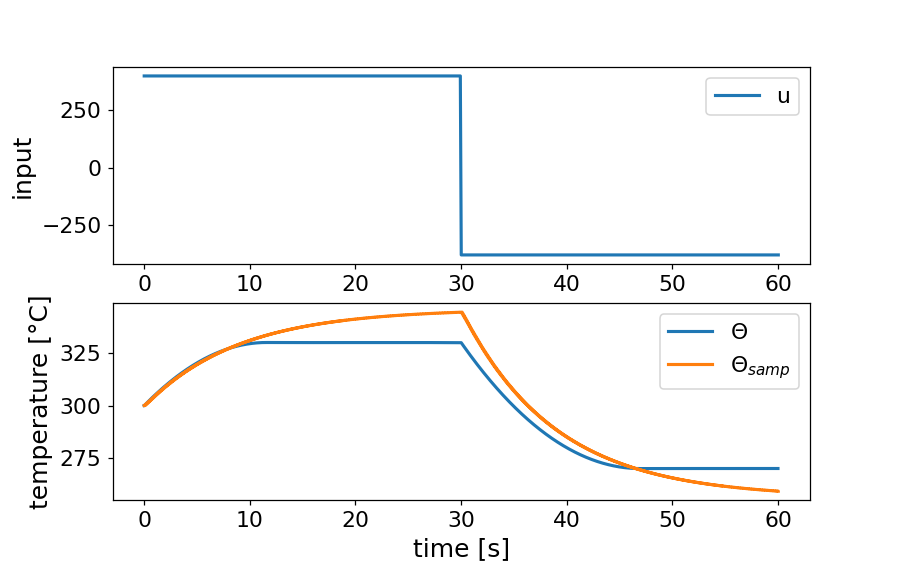

In [157]:
system_7 = Oven()

t_lin = np.linspace(0, 60, 60001)
u_nlin = [0.5 * 270**1.5 if t >= 30 else 0.5 * 330**1.5 for t in t_lin]

x = [[300], [0]]
examples.run(system_7, t_lin, x, u_nlin)

t_s = [i * h for i in range(691)]
u_s = [0.5 * 270**1.5 if t >= 30 else 0.5 * 330**1.5 for t in t_s]
u_s = [u - 0.5 * 300**1.5 for u in u_s]

_, y_samp, _ = control.forced_response(Hz, t_s, u_s)
y_s = [y_l + 300 for y_l in y_samp]

fig, axs = plt.subplots(2)
axs[0].plot(t_s, u_s, '-', label='u')
axs[1].plot(t_lin, x[0], '-', label=r'$\Theta$')
axs[1].step(t_s, y_s, '-', label=r'$\Theta_{samp}$', where='post')
axs[1].set_xlabel('time [s]')
axs[1].set_ylabel('temperature [°C]')
axs[0].set_ylabel('input')
_ = axs[1].legend()
_ = axs[0].legend()

On peut se rendre compte que le transitoire est assez bien respecté. Cependant, le gain n'est pas bon.

Malgré cela, il est difficile de juger si le modèle identifié est suffisamment bon. En effet, tout dépend de son utilisation. Afin de savoir si le modèle obtenu est suffisamment bon, il faudrait, dans notre cas, synthétiser un régulateur linéaire à partir de ce modèle, et l'appliquer au système non-linéaire. Si ce dernier correspond, c'est que le modèle est suffisant pour notre têche. Sinon, le modèle ne correspond pas à notre utilisation et il faudra déterminer un autre modèle.

Nous allons arrêter l'exercice à ce stade de l'étude. Cependant, il faut garder à l'esprit les éléments suivants avant de valider le modèle:

- réaliser un essai de validation de même type que l'essai d'identification mais avec des données non corrélées
- synthétiser un régulateur que l'on applique sur le processus réel afin de valider que le modèle obtenu permet de réaliser nos objectifs